## Usining HDBSCAN Clustering on signatures

In [1]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('predict.csv')[['vl_licitacao','indicador1','indicador2']]
df.shape

(5, 3)

In [3]:
df

,vl_licitacao,indicador1,indicador2
0,7000.0,0.917143,1
1,300000.0,1.000010,1
2,44000.0,1.000000,0
3,18000.0,1.000000,0
4,46920.0,0.408696,0


In [4]:
# Carregando dados do modelo pré-treinado
import pickle

# Carrega o modelo HDBSCAN
with open('hdbscan-model.pkl', 'rb') as input:
    clusterer = pickle.load(input)

# Carrega os dados de treinamento
with open('hdbscan-data.pkl', 'rb') as input:
    data_model = pickle.load(input)

# Carrega a projeção dos dados para plotagem
with open('hdbscan-projection.pkl', 'rb') as input:
    projection_model = pickle.load(input)

# Convertendo Dataframe para Numpy Array
from sklearn.manifold import TSNE
data_predict = df.to_numpy()
projection_predict = TSNE().fit_transform(data_predict)

# Buscando a projeção dos dados de predição para plotagem

projection_predict=[]
i=0
for elem_pred in data_predict: #varre elementos a serem preditos
    if len(elem_pred) == len(data_model[i]) : # qtde de features devem ser iguais!
        for j in range(len(elem_pred)) :
            if elem_pred[0]==data_model[i][j] :
                iguais = True
            else :
                iguais = False
                break
        if iguais :
            projection_predict.append(projection_model[i])
        else :
            break
        i+=1
    else : # os dados de predição número de features diferentes dos dados salvos no treinamento do modelo
        print("Erro ao extrair projeção de plotagem: vetores de predição é diferente dos dados salvos!")               

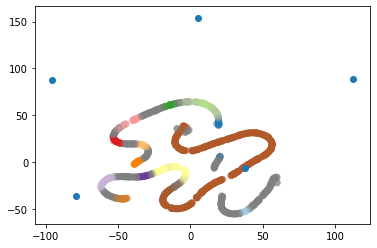

In [5]:
# Ajustando paleta de cores de acordo com o grupo e probabilidade 
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]

# Plotando clusters e dados a serem preditos
plt.scatter(*projection_model.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.scatter(*projection_predict.T)

In [ ]:
clusterer.labels_[0:10]

In [ ]:
hdbscan.all_points_membership_vectors(clusterer)

In [ ]:
c=0
print("Qtde exemplares:",len(clusterer.exemplars_))
for e in clusterer.exemplars_ :
    print("Qtde itens:",len(e))
    c+=len(e)
print("Total: ",c)
clusterer.exemplars_[0].shape

In [ ]:
soft_clusters = hdbscan.all_points_membership_vectors(clusterer)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[np.argmax(x)]
                  for x in soft_clusters]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_colors, alpha=0.25)